In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.colors as colors
import seaborn as sns
import glob as glb

In [ ]:
%cd /content/MyDrive/MyDrive/2023-1/3. Meteo fisica/Datos-rayos

/content/MyDrive/MyDrive/2023-1/3. Meteo fisica/Datos-rayos


In [ ]:
files = sorted(glb.glob("*dat"))
files

['starnet_2015-01.dat',
 'starnet_2015-02.dat',
 'starnet_2015-03.dat',
 'starnet_2015-04.dat',
 'starnet_2015-05.dat',
 'starnet_2015-06.dat',
 'starnet_2015-07.dat',
 'starnet_2015-08.dat',
 'starnet_2015-09.dat',
 'starnet_2015-10.dat',
 'starnet_2015-11.dat',
 'starnet_2015-12.dat',
 'starnet_2016-01.dat',
 'starnet_2016-02.dat',
 'starnet_2016-03.dat',
 'starnet_2016-04.dat',
 'starnet_2016-05.dat',
 'starnet_2016-06.dat',
 'starnet_2016-07.dat',
 'starnet_2016-08.dat',
 'starnet_2016-09.dat',
 'starnet_2016-10.dat',
 'starnet_2016-11.dat',
 'starnet_2016-12.dat',
 'starnet_2017-01.dat',
 'starnet_2017-02.dat',
 'starnet_2017-03.dat',
 'starnet_2017-04.dat',
 'starnet_2017-05.dat',
 'starnet_2017-06.dat',
 'starnet_2017-07.dat',
 'starnet_2017-08.dat',
 'starnet_2017-09.dat',
 'starnet_2017-10.dat',
 'starnet_2017-11.dat']

In [ ]:
archivos=[]
for file in files:
   leer=pd.read_table(file, sep="\s+",header=None)
   leer.rename(columns={0:"year",1:"month",2:"day",3:"hour",4:"minute",
                        5:"second",7:"Y",8:"X",11:"Control",
                        12:"Polaridad"}, inplace=True )
   columnas=["year","month","day","hour","minute","second","Y","X",
             "Control","Polaridad"]
   df = leer[columnas]
   df = df[(df["Y"]>= -12.75)& (df["Y"]<= -10.65)]
   df = df[(df["X"]>= -76.6)& (df["X"]<= -73.25)]
   df = df[df["Control"]==0]
   df = df[(df["Polaridad"]== -3) | (df["Polaridad"]== 3)]
   archivos.append(df)

In [ ]:
combinaciones = []

# Realizar las combinaciones de los primeros 4 archivos
for i in range(0, 34, 2):
    comb = pd.merge(archivos[i], archivos[i+1], how="outer")
    combinaciones.append(comb)

# Realizar las combinaciones de las combinaciones anteriores
while len(combinaciones) > 1:
    new_combinaciones = []
    for i in range(0, len(combinaciones), 2):
        if i+1 < len(combinaciones):
            comb = pd.merge(combinaciones[i], combinaciones[i+1], how="outer")
            new_combinaciones.append(comb)
        else:
            # Agregar la combinación sin pareja (si hay un número impar de combinaciones)
            new_combinaciones.append(combinaciones[i])
    combinaciones = new_combinaciones

resultado_final = combinaciones[0]

In [ ]:
df_clim = pd.merge(resultado_final,archivos[34],how="outer")
df_clim.tail()

,year,month,day,hour,minute,second,Y,X,Control,Polaridad
15721,2017,11,30,22,39,46,-10.81168,-75.70582,0,-3
15722,2017,11,30,0,58,9,-11.86570,-75.39438,0,-3
15723,2017,11,30,1,25,54,-11.98060,-75.28843,0,-3
15724,2017,11,30,1,25,55,-11.90751,-75.29478,0,-3
15725,2017,11,30,1,9,51,-11.81294,-75.44318,0,-3


In [ ]:
df_clim["Date"]=pd.to_datetime(df_clim[['year','month','day',"hour","minute","second"]])
df_clim.head()

,year,month,day,hour,minute,second,Y,X,Control,Polaridad,Date
0,2015,1,1,18,42,41,-10.75407,-76.43712,0,-3,2015-01-01 18:42:41
1,2015,1,1,18,52,24,-11.76677,-76.17023,0,3,2015-01-01 18:52:24
2,2015,1,1,18,54,29,-11.55424,-76.55527,0,-3,2015-01-01 18:54:29
3,2015,1,1,20,30,30,-11.15978,-76.58412,0,-3,2015-01-01 20:30:30
4,2015,1,1,20,36,50,-11.22763,-76.31982,0,-3,2015-01-01 20:36:50


# Frecuencia de rayos en Junin

In [ ]:
dias_por_mes = df_clim.groupby(['year', 'month'])['day'].nunique()
df_dias_por_mes = dias_por_mes.to_frame().reset_index()
df_dias_por_mes.head()

,year,month,day
0,2015,1,16
1,2015,2,27
2,2015,3,24
3,2015,4,21
4,2015,5,21


In [ ]:
suma_total = df_dias_por_mes.groupby('month')['day'].sum()
df_suma_total= suma_total.to_frame().reset_index()
df_suma_total.head()

,month,day
0,1,66
1,2,80
2,3,79
3,4,73
4,5,66


In [ ]:
df_dias_por_mes_2015 = df_dias_por_mes[df_dias_por_mes["year"]==2015]
df_dias_por_mes_2016 = df_dias_por_mes[df_dias_por_mes["year"]==2016]
df_dias_por_mes_2017 = df_dias_por_mes[df_dias_por_mes["year"]==2017]

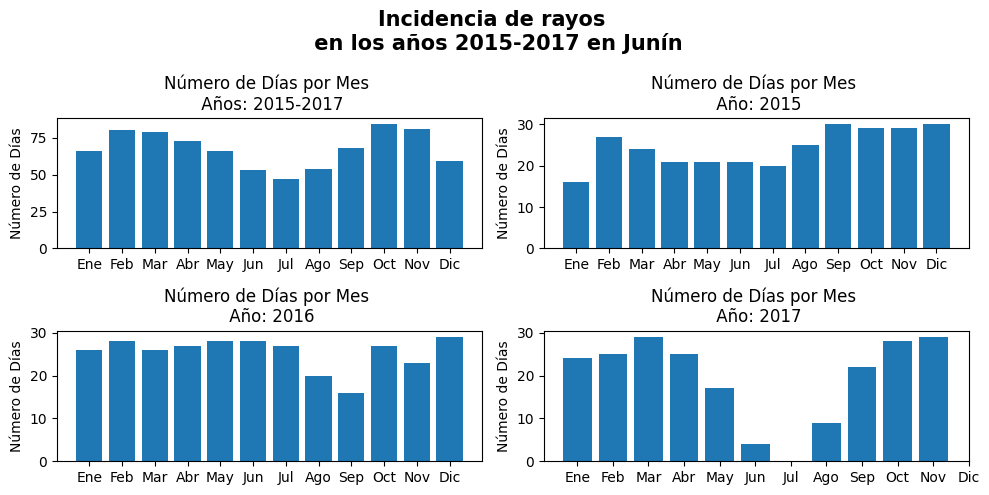

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 5))
fig.suptitle("Incidencia de rayos \n en los años 2015-2017 en Junín", fontsize=15,fontweight="bold")
ax1 = axs[0,0]
ax1.bar(df_suma_total['month'], df_suma_total['day'])
ax1.set_xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
ax1.set_ylabel('Número de Días')
ax1.set_title('Número de Días por Mes \n Años: 2015-2017')

ax2 = axs[0,1]
ax2.bar(df_dias_por_mes_2015['month'], df_dias_por_mes_2015['day'])
ax2.set_xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
ax2.set_ylabel('Número de Días')
ax2.set_title('Número de Días por Mes \n Año: 2015')

ax3 = axs[1,0]
ax3.bar(df_dias_por_mes_2016['month'], df_dias_por_mes_2016['day'])
ax3.set_xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
ax3.set_ylabel('Número de Días')
ax3.set_title('Número de Días por Mes \n Año: 2016')

ax4 = axs[1,1]
ax4.bar(df_dias_por_mes_2017['month'], df_dias_por_mes_2017['day'])
ax4.set_xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
ax4.set_ylabel('Número de Días')
ax4.set_title('Número de Días por Mes \n Año: 2017')

plt.tight_layout()

# Frecuencia de rayos en CANCHAYLLO

In [ ]:
archivos_Canchayllo=[]
for file in files:
   leer=pd.read_table(file, sep="\s+",header=None)
   leer.rename(columns={0:"year",1:"month",2:"day",3:"hour",4:"minute",
                        5:"second",7:"Y",8:"X",11:"Control",
                        12:"Polaridad"}, inplace=True )
   columnas=["year","month","day","hour","minute","second","Y","X",
             "Control","Polaridad"]
   df = leer[columnas]
   df = df[(df["Y"]>= -12)& (df["Y"]<= -11.75)]
   df = df[(df["X"]>= -76)& (df["X"]<= -75.75)]
   df = df[df["Control"]==0]
   df = df[(df["Polaridad"]== -3) | (df["Polaridad"]== 3)]
   archivos_Canchayllo.append(df)

In [ ]:
combinaciones = []

# Realizar las combinaciones de los primeros 4 archivos
for i in range(0, 34, 2):
    comb = pd.merge(archivos_Canchayllo[i], archivos_Canchayllo[i+1], how="outer")
    combinaciones.append(comb)

# Realizar las combinaciones de las combinaciones anteriores
while len(combinaciones) > 1:
    new_combinaciones = []
    for i in range(0, len(combinaciones), 2):
        if i+1 < len(combinaciones):
            comb = pd.merge(combinaciones[i], combinaciones[i+1], how="outer")
            new_combinaciones.append(comb)
        else:
            # Agregar la combinación sin pareja (si hay un número impar de combinaciones)
            new_combinaciones.append(combinaciones[i])
    combinaciones = new_combinaciones

resultado_final = combinaciones[0]

In [ ]:
df_clim_Canchayllo = pd.merge(resultado_final,archivos_Canchayllo[34],how="outer")
df_clim_Canchayllo.tail()

,year,month,day,hour,minute,second,Y,X,Control,Polaridad
892,2017,11,24,18,16,30,-11.90019,-75.78785,0,-3
893,2017,11,24,20,40,56,-11.82758,-75.88909,0,3
894,2017,11,26,20,17,1,-11.89477,-75.89492,0,-3
895,2017,11,26,20,8,37,-11.93906,-75.78696,0,-3
896,2017,11,26,21,2,29,-11.83476,-75.99248,0,-3


In [ ]:
dias_por_mes_Canchayllo = df_clim_Canchayllo.groupby(['year', 'month'])['day'].nunique()
df_dias_por_mes_Canchayllo = dias_por_mes_Canchayllo.to_frame().reset_index()
df_dias_por_mes_Canchayllo.head()

,year,month,day
0,2015,1,3
1,2015,2,11
2,2015,3,10
3,2015,4,2
4,2015,5,4


In [ ]:
suma_total_Canchayllo = df_dias_por_mes_Canchayllo.groupby('month')['day'].sum()
df_suma_total_Canchayllo= suma_total_Canchayllo.to_frame().reset_index()
df_suma_total_Canchayllo.head()

,month,day
0,1,21
1,2,42
2,3,36
3,4,20
4,5,12


In [ ]:
df_Canchayllo_2015 = df_dias_por_mes_Canchayllo[df_dias_por_mes_Canchayllo["year"]==2015]
df_Canchayllo_2016 = df_dias_por_mes_Canchayllo[df_dias_por_mes_Canchayllo["year"]==2016]
df_Canchayllo_2017 = df_dias_por_mes_Canchayllo[df_dias_por_mes_Canchayllo["year"]==2017]

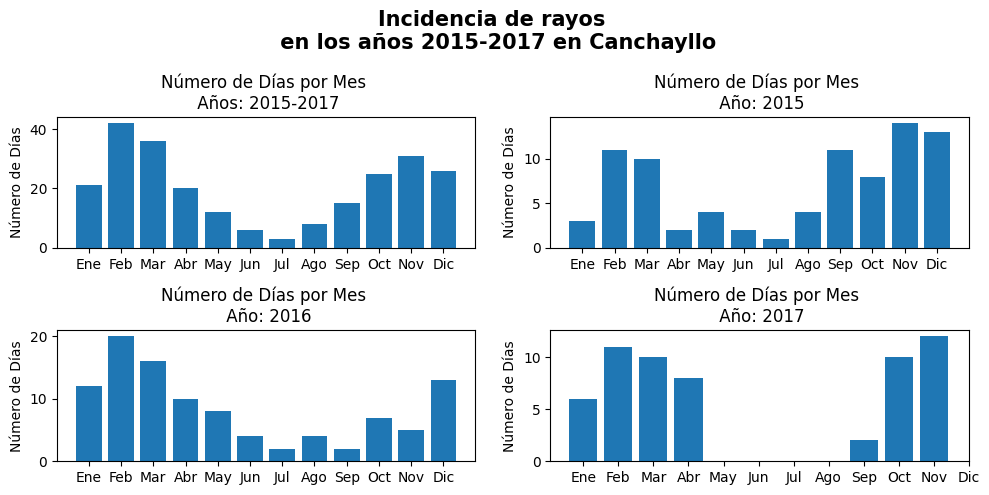

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 5))
fig.suptitle("Incidencia de rayos \n en los años 2015-2017 en Canchayllo", fontsize=15,fontweight="bold")
ax1 = axs[0,0]
ax1.bar(df_suma_total_Canchayllo['month'], df_suma_total_Canchayllo['day'])
ax1.set_xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
ax1.set_ylabel('Número de Días')
ax1.set_title('Número de Días por Mes \n Años: 2015-2017')

ax2 = axs[0,1]
ax2.bar(df_Canchayllo_2015['month'], df_Canchayllo_2015['day'])
ax2.set_xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
ax2.set_ylabel('Número de Días')
ax2.set_title('Número de Días por Mes \n Año: 2015')

ax3 = axs[1,0]
ax3.bar(df_Canchayllo_2016['month'], df_Canchayllo_2016['day'])
ax3.set_xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
ax3.set_ylabel('Número de Días')
ax3.set_title('Número de Días por Mes \n Año: 2016')

ax4 = axs[1,1]
ax4.bar(df_Canchayllo_2017['month'], df_Canchayllo_2017['day'])
ax4.set_xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
ax4.set_ylabel('Número de Días')
ax4.set_title('Número de Días por Mes \n Año: 2017')

plt.tight_layout()

# Hora Junin

In [ ]:
horas_repetidas = df_clim['hour'].value_counts()
horas_repetidas = horas_repetidas.sort_index()
horas_repetidas

0      484
1      231
2      209
3      276
4      233
5      203
6      218
7      165
8      278
9      186
10     226
11     350
12     306
13     153
14     109
15     102
16     276
17     681
18    1565
19    2272
20    2631
21    2251
22    1359
23     962
Name: hour, dtype: int64

Text(0.5, 1.0, 'Frecuencia de horas  en la incidencia de rayos en Junin \n Años: 2015-2017')

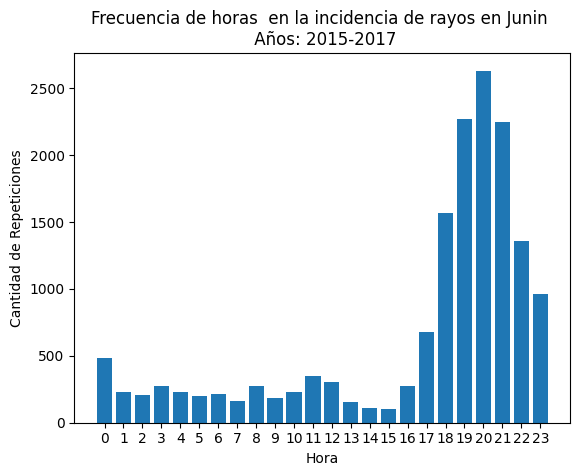

In [ ]:
plt.bar(horas_repetidas.index, horas_repetidas)
plt.xlabel('Hora')
plt.ylabel('Cantidad de Repeticiones')
plt.xticks(range(min(horas_repetidas.index), max(horas_repetidas.index)+1, 1))
plt.title('Frecuencia de horas  en la incidencia de rayos en Junin \n Años: 2015-2017')

In [ ]:
horas_repetidas_Canchayllo = df_clim_Canchayllo['hour'].value_counts()
horas_repetidas_Canchayllo = horas_repetidas_Canchayllo.sort_index()
horas_repetidas_Canchayllo

0       9
1       6
2       1
3       1
4       2
5       1
6       2
8       3
9       1
10      1
11      3
12      2
14      1
15      2
16      6
17     37
18     95
19    141
20    201
21    212
22    118
23     52
Name: hour, dtype: int64

Text(0.5, 1.0, 'Frecuencia de horas  en la incidencia de rayos en Canchayllo \n Años: 2015-2017')

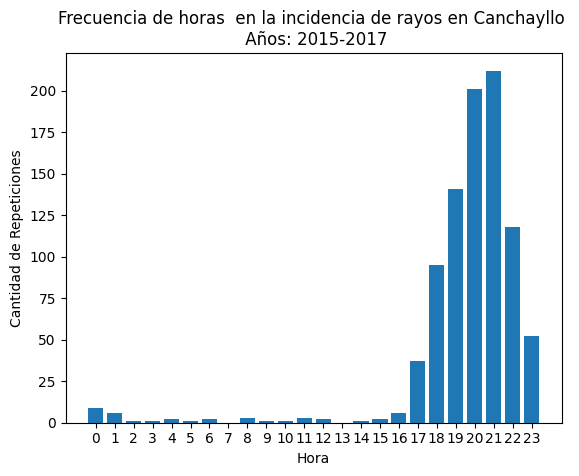

In [ ]:
plt.bar(horas_repetidas_Canchayllo.index, horas_repetidas_Canchayllo)
plt.xlabel('Hora')
plt.ylabel('Cantidad de Repeticiones')
plt.xticks(range(min(horas_repetidas_Canchayllo.index), max(horas_repetidas_Canchayllo.index)+1, 1))
plt.title('Frecuencia de horas  en la incidencia de rayos en Canchayllo \n Años: 2015-2017')